# Checking the distortion scale in case8-challenge00

In this note, we check the scale of the distortion applied in case8-challenge00.

At first, we import some required modules.

In [1]:
import numpy as np
import matplotlib.pylab as plt
import warpfield as w

Next, we define the distortion generator that is used in generate_case8.py, the problem generator for case8.

In [2]:
def distortion_generator(c, K):
  from functools import reduce
  from operator import add
  cx,cy = c
  r0 = max((cx-20000.)**2+(cy-20000.)**2, (cx+20000.)**2+(cy-20000.)**2,
           (cx-20000.)**2+(cy+20000.)**2, (cx+20000.)**2+(cy+20000.)**2)
  def distortion(position):
    position = np.array(position)
    center = np.array(c).reshape((2,1))
    ka = K.reshape((-1,2))
    r2 = np.square(position-center).sum(axis=0,keepdims=True)/r0
    Kp = 1-reduce(add,[k.reshape((2,1))*(r2**(n+1)) for n,k in enumerate(ka)])
    return (position-center)/Kp+center
  return distortion

Then, we construct a calculator which calculates the distortion in case8-challenge00.

In [3]:
distortion_xc=23199.39418114051
distortion_yc=9865.84841970366
distortion_K = np.zeros(6)
distortion_K[0]=-0.0023415337472333596
distortion_K[1]=-0.0023413695694918055
distortion_K[2]=0.015792128155073915
distortion_K[3]=0.007674347291529088
distortion_K[4]=-0.004694743859349522
distortion_K[5]=0.005425600435859647
distortion = distortion_generator([distortion_xc, distortion_yc], distortion_K)

The values of distortion_xc, distortion_yc, and distortion_K are quoted from case8_challenge_00.txt.

Finally, we set grid points on the focal plane (x0 and y0) and calculate the distortion for each point (x_distorted and y_distorted).

In [4]:
detector_width  = w.Detector.pixel_scale*w.Detector.naxis1
detector_height = w.Detector.pixel_scale*w.Detector.naxis2

ngrid = 31 # odd number
x0, y0 = np.indices((ngrid, ngrid)) - (ngrid-1)/2 
x0 = x0.flatten()*detector_width/(ngrid-1)
y0 = y0.flatten()*detector_height/(ngrid-1)

x_distorted, y_distorted = distortion([x0, y0])
dx = x_distorted - x0
dy = y_distorted - y0

dx and dy are the displacements caused by the distortion.

Let's check the distortion. The vector in the figure below shows the displacement caused by the distortion magnified by 10.

(-25000.0, 25000.0)

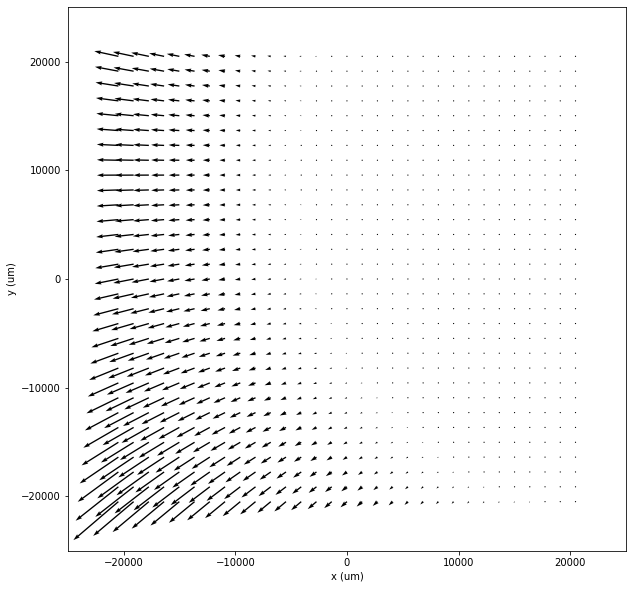

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.quiver(x0, y0, dx*10, dy*10, angles='xy', scale_units='xy', scale=1)
plt.xlabel("x (um)")
plt.ylabel("y (um)")
plt.xlim([-25000, 25000])
plt.ylim([-25000, 25000])

The maximum displacement is...

In [6]:
dd = np.sqrt(dx*dx+dy*dy)
print("Maximum displacement (um): {}".format(np.max(dd)))

Maximum displacement (um): 536.3546810669083
